### Let's see whether we can predict the duration and Actual net revenue of projects

In [1]:
#!pip install pydlm

In [6]:
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
import pandas as pd

In [8]:
df = pd.read_csv('mv_port_processed.csv')

In [9]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df['Project Number'] = df['Project Number'].astype('str') 
df = df.loc[:, ~df.columns.str.contains('^index')]

In [38]:
df_sub = df[['Date','Project Number','Actual Net Revenue - MTD','Project Status', 'Contract Type Name', 'Ultimate Customer AUS Market Sector', 'Division Short Name', 'Proj_CVP', 'Proj_Serv_Offering',
             'primary_client_industry', 'Funding Amount - ITC (Snapshot)', 'Backlog NR',  'Actual Direct Labor Cost - MTD', 'Actual Non-Labor Cost - MTD',
       'Actual Gross Revenue - MTD', 'EBITA - MTD',
       'Forecast Direct Labor Cost - ITC', 'Forecast Net Revenue - ITC',
       'Order Intake (NR) - MTD', 'AUS Mkt Sector Aggregate', 'Baseline NR', 'Organization Size',
       'Risk Profile', 'riskrating_project', 'ActualNR_sum', 'Projectduration', 'Completion', 'scheduled_duration', 'Scheduled_projectduration', 'intime', 'seasonality_month']]

In [39]:
len(df_sub)

1269171

In [81]:
df_sub['scheduled_duration'] = df_sub['scheduled_duration'].str.replace(r'days', '')
df_sub['scheduled_duration'] = df_sub['scheduled_duration'].replace(np.nan, 0)
df_sub['scheduled_duration'] = df_sub['scheduled_duration'].astype('int') 

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

### We need to dummy encode now

In [12]:
Project_Status = pd.get_dummies(df_sub['Project Status'], drop_first=True)
Contract_Name = pd.get_dummies(df_sub['Contract Type Name'], drop_first=True)
Ultimate_AUS = pd.get_dummies(df_sub['Ultimate Customer AUS Market Sector'], drop_first=True)
Divison = pd.get_dummies(df_sub['Division Short Name'], drop_first=True)
#Region = pd.get_dummies(df_sub['Region'], drop_first=True)
Proj_CVP = pd.get_dummies(df_sub['Proj_CVP'], drop_first=True)
Proj_Serv_Offering = pd.get_dummies(df_sub['Proj_Serv_Offering'], drop_first=True)
Client = pd.get_dummies(df_sub['primary_client_industry'], drop_first=True)
Aggregate_AUS = pd.get_dummies(df_sub['AUS Mkt Sector Aggregate'], drop_first=True)
Orgsize = pd.get_dummies(df_sub['Organization Size'], drop_first=True)
Profile = pd.get_dummies(df_sub['Risk Profile'], drop_first=True)



df_sub = pd.concat([df_sub, Project_Status], axis=1)
df_sub = pd.concat([df_sub, Contract_Name], axis=1)
df_sub = pd.concat([df_sub, Ultimate_AUS], axis=1)
df_sub = pd.concat([df_sub, Divison], axis=1)
#df_sub = pd.concat([df_sub, Region], axis=1)
df_sub = pd.concat([df_sub, Proj_CVP], axis=1)
df_sub = pd.concat([df_sub, Proj_Serv_Offering], axis=1)
df_sub = pd.concat([df_sub, Client], axis=1)
df_sub = pd.concat([df_sub, Aggregate_AUS], axis=1)
df_sub = pd.concat([df_sub, Orgsize], axis=1)
df_sub = pd.concat([df_sub, Profile], axis=1)

df_sub = df_sub.drop(columns=['Project Status', 'Contract Type Name', 'Ultimate Customer AUS Market Sector', 'Division Short Name',
                              'Proj_CVP', 'Proj_Serv_Offering', 'primary_client_industry', 'AUS Mkt Sector Aggregate', 'Organization Size', 'Risk Profile'])
df_sub

,Date,Project Number,Actual Net Revenue - MTD,Funding Amount - ITC (Snapshot),Backlog NR,Actual Direct Labor Cost - MTD,Actual Non-Labor Cost - MTD,Actual Gross Revenue - MTD,EBITA - MTD,Forecast Direct Labor Cost - ITC,...,Transp/Log,Key Global,Key Local,Key Regional,Local,RKC,Unspecified,Low,Medium,Unspecified
0,201711,000221760018,111.72,68313,0.00,46.65,NaN,111.72,-5.17,0.00,...,0,0,0,0,0,1,0,0,0,1
1,201712,000221760018,10406.45,68313,0.00,1353.76,NaN,52149.10,7014.47,0.00,...,0,0,0,0,0,1,0,0,0,1
2,201801,000221760018,-2048.91,68313,0.00,17.55,NaN,-2048.91,-2092.03,0.00,...,0,0,0,0,0,1,0,0,0,1
3,201802,000221760018,87.02,68313,3207.95,36.55,NaN,14893.44,-2.78,2064.61,...,0,0,0,0,0,1,0,0,0,1
4,201803,000221760018,185.22,68313,3022.73,85.81,NaN,185.22,-25.60,2064.61,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269166,201902,zz000zzznt20,0.00,0,0.00,0.00,NaN,0.00,0.00,0.00,...,0,0,0,0,1,0,0,0,0,1
1269167,201903,zz000zzznt20,0.00,0,0.00,0.00,NaN,0.00,0.00,0.00,...,0,0,0,0,1,0,0,0,0,1
1269168,201904,zz000zzznt20,0.00,0,0.00,0.00,NaN,0.00,0.00,0.00,...,0,0,0,0,1,0,0,0,0,1
1269169,201905,zz000zzznt20,0.00,0,0.00,0.00,NaN,0.00,0.00,0.00,...,0,0,0,0,1,0,0,0,0,1


In [11]:
correlation_df = df[['Actual Net Revenue - MTD', 'Funding Amount - ITC (Snapshot)', 'Backlog NR', 'Actual Direct Labor Cost - MTD', 'Actual Non-Labor Cost - MTD', 'Actual Non-Labor Cost - MTD', 'EBITA - MTD', 'Forecast Direct Labor Cost - ITC', 
                    'Forecast Net Revenue - ITC', 'Order Intake (NR) - MTD', 'Baseline NR', 'riskrating_project', 'ActualNR_sum', 'Projectduration', 'Completion', 'Scheduled_projectduration', 'seasonality_month']]


In [19]:
df_sub.corr(method ='pearson')

,Funding Amount - ITC (Snapshot),Backlog NR,Actual Direct Labor Cost - MTD,Actual Non-Labor Cost - MTD,Actual Gross Revenue - MTD,Actual Net Revenue - MTD,EBITA - MTD,Forecast Direct Labor Cost - ITC,Forecast Net Revenue - ITC,Order Intake (NR) - MTD,...,Transp/Log,Key Global,Key Local,Key Regional,Local,RKC,Unspecified,Low,Medium,Unspecified
Funding Amount - ITC (Snapshot),1.000000,0.438156,0.019451,0.373201,0.060993,0.020088,0.021686,0.722600,0.746455,0.078865,...,-0.029490,-0.008763,-0.000166,0.001705,-0.013314,0.051806,-0.010906,-0.045112,0.053158,-0.056150
Backlog NR,0.438156,1.000000,0.021418,0.186730,0.037168,0.020349,0.011202,0.514491,0.532115,0.201932,...,-0.018655,-0.010816,-0.003163,-0.004490,0.000298,0.040833,-0.015491,-0.023658,0.052349,-0.036174
Actual Direct Labor Cost - MTD,0.019451,0.021418,1.000000,0.359079,0.988012,0.993394,0.645172,0.023820,0.023433,0.006276,...,-0.000979,-0.000693,-0.000114,0.000391,0.000009,0.002342,-0.001480,-0.000620,0.003996,-0.001715
Actual Non-Labor Cost - MTD,0.373201,0.186730,0.359079,1.000000,0.770852,0.158402,-0.006945,0.149755,0.153377,0.039923,...,-0.004912,-0.005098,-0.001673,0.010147,-0.002441,0.004993,0.004484,-0.020732,0.012788,-0.002610
Actual Gross Revenue - MTD,0.060993,0.037168,0.988012,0.770852,1.000000,0.994429,0.722923,0.039366,0.041204,0.040976,...,-0.001402,-0.001072,-0.000223,0.001263,-0.000046,0.004166,-0.002799,-0.000607,0.006174,-0.003328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RKC,0.051806,0.040833,0.002342,0.004993,0.004166,0.002374,0.001805,0.063419,0.066124,0.004837,...,0.230834,-0.072962,-0.028525,-0.085375,-0.353903,1.000000,-0.292005,0.066210,-0.016663,0.114710
Unspecified,-0.010906,-0.015491,-0.001480,0.004484,-0.002799,-0.001467,-0.000933,-0.021259,-0.017914,0.002381,...,-0.016468,-0.087353,-0.034151,-0.102215,-0.423708,-0.292005,1.000000,-0.144381,-0.059060,-0.300722
Low,-0.045112,-0.023658,-0.000620,-0.020732,-0.000607,-0.000608,-0.000143,-0.057229,-0.062760,-0.001619,...,0.084702,-0.001940,0.009343,0.087572,-0.035269,0.066210,-0.144381,1.000000,-0.429314,-0.414702
Medium,0.053158,0.052349,0.003996,0.012788,0.006174,0.004069,0.002707,0.073793,0.080322,0.014984,...,0.047165,0.070268,0.036376,0.047724,0.043817,-0.016663,-0.059060,-0.429314,1.000000,-0.269732


### Now let's do a regression on Project status

In [17]:
df_sub['Project Status'].unique()

array(['Open/Active', 'On Hold - Inactive', 'Closed',
       'Closed-Open to Collect', 'Final Closure Requested', nan,
       'New - Pending Approval', 'Rejected', 'Unspecified', 'New',
       'Manual_Adj'], dtype=object)

In [82]:
''' We need to get the project numbers where we have closed entries, get the variables from the first entry but the actualNR Sum of the last entry'''

df_closed = df_sub[df_sub['Project Status'] == 'Closed']
df_opentocollect = df_sub[df_sub['Project Status'] == 'Closed-Open to Collect']


df_merged = pd.concat([df_opentocollect, df_closed])
df_merged.drop_duplicates(subset=['Project Number'], keep='last', inplace=True)
df_projnumber = df_merged[['Project Number', 'ActualNR_sum']].copy()

#use the df_sub again and just keep all first entries, then merge on project number only
df_first = df_sub.drop_duplicates(subset=['Project Number'], keep='first')

df_actualNR = pd.merge(df_projnumber, df_first, how='inner', on='Project Number')

#df_actualNR = df_sub[df_sub['ActualNR_sum'] != ]

len(df_actualNR)

32067

In [83]:
df_actualNR.pop('Project Status')
df_actualNR.pop('Project Number')
df_actualNR.pop('ActualNR_sum_y')
'This one we cant know'
df_actualNR.pop('Projectduration')

0        15
1        15
2        15
3        15
4        15
         ..
32062    44
32063    33
32064    27
32065    20
32066    13
Name: Projectduration, Length: 32067, dtype: int64

In [84]:
### Now let's dummy encode
Contract_Name = pd.get_dummies(df_actualNR['Contract Type Name'], drop_first=True)
Ultimate_AUS = pd.get_dummies(df_actualNR['Ultimate Customer AUS Market Sector'], drop_first=True)
Divison = pd.get_dummies(df_actualNR['Division Short Name'], drop_first=True)
#Region = pd.get_dummies(df_sub['Region'], drop_first=True)
Proj_CVP = pd.get_dummies(df_actualNR['Proj_CVP'], drop_first=True)
Proj_Serv_Offering = pd.get_dummies(df_actualNR['Proj_Serv_Offering'], drop_first=True)
Client = pd.get_dummies(df_actualNR['primary_client_industry'], drop_first=True)
Aggregate_AUS = pd.get_dummies(df_actualNR['AUS Mkt Sector Aggregate'], drop_first=True)
Orgsize = pd.get_dummies(df_actualNR['Organization Size'], drop_first=True)
Profile = pd.get_dummies(df_actualNR['Risk Profile'], drop_first=True)
Date = pd.get_dummies(df_actualNR['Date'], drop_first=True)



df_actualNR = pd.concat([df_actualNR, Date], axis=1)
df_actualNR = pd.concat([df_actualNR, Contract_Name], axis=1)
df_actualNR = pd.concat([df_actualNR, Ultimate_AUS], axis=1)
df_actualNR = pd.concat([df_actualNR, Divison], axis=1)
#df_sub = pd.concat([df_sub, Region], axis=1)
df_actualNR = pd.concat([df_actualNR, Proj_CVP], axis=1)
df_actualNR = pd.concat([df_actualNR, Proj_Serv_Offering], axis=1)
df_actualNR = pd.concat([df_actualNR, Client], axis=1)
df_actualNR = pd.concat([df_actualNR, Aggregate_AUS], axis=1)
df_actualNR = pd.concat([df_actualNR, Orgsize], axis=1)
df_actualNR = pd.concat([df_actualNR, Profile], axis=1)

df_actualNR = df_actualNR.drop(columns=['Date','Contract Type Name', 'Ultimate Customer AUS Market Sector', 'Division Short Name',
                              'Proj_CVP', 'Proj_Serv_Offering', 'primary_client_industry', 'AUS Mkt Sector Aggregate', 'Organization Size', 'Risk Profile'])
df_actualNR

,ActualNR_sum_x,Actual Net Revenue - MTD,Funding Amount - ITC (Snapshot),Backlog NR,Actual Direct Labor Cost - MTD,Actual Non-Labor Cost - MTD,Actual Gross Revenue - MTD,EBITA - MTD,Forecast Direct Labor Cost - ITC,Forecast Net Revenue - ITC,...,Transp/Log,Key Global,Key Local,Key Regional,Local,RKC,Unspecified,Low,Medium,Unspecified
0,21839,2900.00,733572,92293.61,1276.25,0.00,2900.00,-111.9500,59406.75,202204.76,...,0,0,0,0,0,0,1,0,0,0
1,9093,0.00,97237,0.00,757.88,2700.00,2700.00,-1788.5968,7470.32,-12669.36,...,0,0,0,0,0,0,1,0,0,0
2,-5175,397.50,386461,0.00,277.66,0.00,397.50,-257.7776,33602.16,87626.98,...,0,0,0,0,0,0,1,1,0,0
3,1177,706.50,22500,942.00,220.50,0.00,706.50,186.1200,7648.35,22491.99,...,0,0,0,0,0,0,1,1,0,0
4,13458,817.24,50676,0.00,537.55,14.92,832.16,-451.3780,13062.48,25969.26,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32062,32140,14996.00,44575,0.00,4700.65,NaN,14996.00,3152.7100,10510.07,30044.40,...,0,0,0,0,0,1,0,0,0,1
32063,2793,0.00,0,0.00,0.00,NaN,0.00,0.0000,0.00,0.00,...,0,0,0,0,1,0,0,0,0,1
32064,39282,1176.01,43500,24729.07,454.76,NaN,1176.01,148.0700,9550.16,25905.08,...,0,0,0,0,0,0,0,0,0,1
32065,51657,0.00,107400,48943.24,0.00,NaN,0.00,0.0000,18798.18,48943.24,...,0,0,0,0,0,0,0,0,0,1


In [94]:
import numpy as np

len(df_actualNR)
df_actualNR.replace([np.inf, -np.inf], np.nan, inplace=True)
df_actualNR=df_actualNR.fillna(0)
df_actualNR=df_actualNR.replace(np.nan,0)

In [2]:
''' Lets do the split '''

from sklearn.model_selection import train_test_split

X = df_actualNR.iloc[:,1:]
y = df_actualNR.iloc[:,:1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

NameError: name 'df_actualNR' is not defined

In [96]:
np.any(np.isnan(y))

False

In [111]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score


gbr = GradientBoostingRegressor() 
gbr.fit(X_train, y_train.values.ravel())
score_gbr_best = cross_val_score(gbr, X_train, y_train.values.ravel(), cv=5)
y_predict = gbr.predict(X_test)


print(score_gbr_best.mean())
print(gbr.score(X_test, y_test))

0.24401428673124786
0.6333085318928647


In [131]:
y_test = y_test.to_numpy()

In [132]:
import matplotlib.pyplot as plt

def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='orange')
    plt.title(regressorName)
    plt.show()
    return

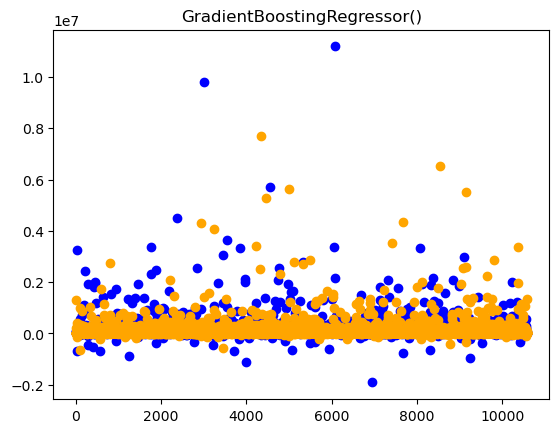

In [133]:
plotGraph(y_test, y_predict, gbr)

In [107]:
# set up Grid Search CV for Gradient Boosting
from sklearn.model_selection import GridSearchCV

gbr_grid = {'max_depth': [1,2,3,4,5]}

grid_gbr = GridSearchCV(estimator=gbr,param_grid=gbr_grid, cv=5, n_jobs=-1)

# fit combinations
grid_gbr.fit(X_train, y_train.values.ravel())

grid_gbr.best_params_

{'max_depth': 5}

In [134]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train.values.ravel())
score_forest_best = cross_val_score(forest, X_train, y_train.values.ravel(), cv=5)
print(score_forest_best.mean())
print(forest.score(X_test, y_test))

0.544834173193822
0.4160158633291918


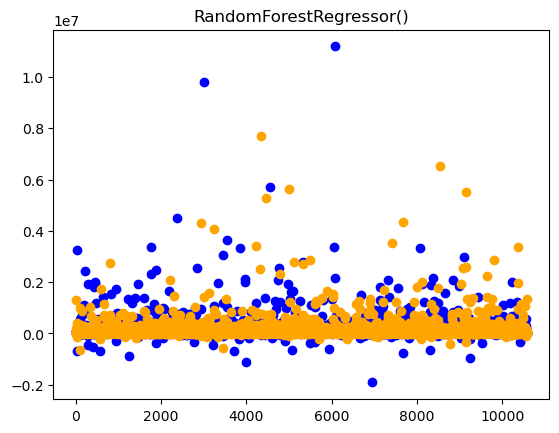

In [135]:
plotGraph(y_test, y_predict, forest)

In [140]:
!pip install xgboost
! brew install libomp

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 7 taps (homebrew/cask-versions, homebrew/core, homebrew/cask, homebrew/services, chenrui333/tap, caskroom/versions and adoptopenjdk/openjdk).
==> New Formulae
archey4             gitwatch            mongosh             revive
argocd-autopilot    gnupg@2.2           moto                rmw
at-spi2-atk         go-boring           mr2                 rosa-cli
at-spi2-core        gpg-tui             multitime           scotch
atuin               gradle@6            mx                  search-that-hash
autoconf@2.69       grepip              neovim-remote       seqkit
autorestic          gtksourceview5      net-tools           simde
avahi               haruhi-dl           nomino              six
brook               himalaya            nox                 smu
cadence-workflow    imath               oksh                spaceship
cadical             ipinfo-cli          openexr@2           sqlbench
caire               julia               o

In [1]:
import xgboost as xgb

xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train.values.ravel())
score_xgbr_best = cross_val_score(gbr, X_train, y_train.values.ravel(), cv=5)
print(score_gbr_best.mean())
print(gbr.score(X_test, y_test))

NameError: name 'X_train' is not defined

In [ ]:
plotGraph(y_test, y_predict, xgbr)

### Now let's run the same regression for Project duration

In [ ]:
''' We need to get the project numbers where we have closed entries, get the variables from the first entry but the actualNR Sum of the last entry'''

df_closed = df_sub[df_sub['Project Status'] == 'Closed']
df_opentocollect = df_sub[df_sub['Project Status'] == 'Closed-Open to Collect']


df_merged = pd.concat([df_opentocollect, df_closed])
df_merged.drop_duplicates(subset=['Project Number'], keep='last', inplace=True)
df_projnumber = df_merged[['Project Number', 'Projectduration']].copy()

#use the df_sub again and just keep all first entries, then merge on project number only
df_first = df_sub.drop_duplicates(subset=['Project Number'], keep='first')

df_actuaDR = pd.merge(df_projnumber, df_first, how='inner', on='Project Number')

#df_actualNR = df_sub[df_sub['ActualNR_sum'] != ]

len(df_actuaDR)

In [ ]:
df_actuaDR.pop('Project Status')
df_actuaDR.pop('Project Number')
df_actuaDR.pop('ActualNR_sum_y')
df_actuaDR.pop('ActualNR_sum') # 

In [ ]:
### Now let's dummy encode
Contract_Name = pd.get_dummies(df_actuaDR['Contract Type Name'], drop_first=True)
Ultimate_AUS = pd.get_dummies(df_actuaDR['Ultimate Customer AUS Market Sector'], drop_first=True)
Divison = pd.get_dummies(df_actuaDR['Division Short Name'], drop_first=True)
#Region = pd.get_dummies(df_sub['Region'], drop_first=True)
Proj_CVP = pd.get_dummies(df_actuaDR['Proj_CVP'], drop_first=True)
Proj_Serv_Offering = pd.get_dummies(df_actuaDR['Proj_Serv_Offering'], drop_first=True)
Client = pd.get_dummies(df_actuaDR['primary_client_industry'], drop_first=True)
Aggregate_AUS = pd.get_dummies(df_actuaDR['AUS Mkt Sector Aggregate'], drop_first=True)
Orgsize = pd.get_dummies(df_actuaDR['Organization Size'], drop_first=True)
Profile = pd.get_dummies(df_actuaDR['Risk Profile'], drop_first=True)
Date = pd.get_dummies(df_actuaDR['Date'], drop_first=True)



df_actuaDR = pd.concat([df_actuaDR, Date], axis=1)
df_actuaDR = pd.concat([df_actuaDR, Contract_Name], axis=1)
df_actuaDR = pd.concat([df_actuaDR, Ultimate_AUS], axis=1)
df_actuaDR = pd.concat([df_actuaDR, Divison], axis=1)
#df_sub = pd.concat([df_sub, Region], axis=1)
df_actuaDR = pd.concat([df_actuaDR, Proj_CVP], axis=1)
df_actuaDR = pd.concat([df_actuaDR, Proj_Serv_Offering], axis=1)
df_actuaDR = pd.concat([df_actuaDR, Client], axis=1)
df_actuaDR = pd.concat([df_actuaDR, Aggregate_AUS], axis=1)
df_actuaDR = pd.concat([df_actuaDR, Orgsize], axis=1)
df_actuaDR = pd.concat([df_actuaDR, Profile], axis=1)

df_actuaDR = df_actuaDR.drop(columns=['Date','Contract Type Name', 'Ultimate Customer AUS Market Sector', 'Division Short Name',
                              'Proj_CVP', 'Proj_Serv_Offering', 'primary_client_industry', 'AUS Mkt Sector Aggregate', 'Organization Size', 'Risk Profile'])
df_actuaDR

In [ ]:
import numpy as np

len(df_actualNR)
df_actualNR.replace([np.inf, -np.inf], np.nan, inplace=True)
df_actualNR=df_actualNR.fillna(0)
df_actualNR=df_actualNR.replace(np.nan,0)

In [ ]:
https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [31]:
len(df_sub.columns.to_list())

241

In [9]:
def obtain_df(project, df):
    df_project = df[df['Project Number'] == project]
    #df_project = df_project[['Fiscal Period Code', 'Funding Amount - ITC (Snapshot)', 'Backlog NR', 'Actual Gross Revenue - MTD']].copy()
    df_project['Backlog_Shifted'] = df_project['Backlog NR'].transform(lambda x: x.shift())
    df_project.reset_index(inplace=True)
    df_project = df_project.loc[:, ~df_project.columns.str.contains('^index')]
    return df_project

def random_project(df):
    df = df.sample(n=1)
    project_number = df['Project Number'].item()
    return project_number

In [94]:
random_project(df_sub)

'30013277'

In [ ]:
obtain_df('30013277', df_sub)

In [ ]:
# define base model
model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)

In [ ]:
# construct the base
myDLM = dlm(data)
# adding model components
# add a first-order trend (linear trending) with prior covariance 1.0
myDLM = myDLM + trend(1, name='lineTrend', w=1.0)
# add a 7 day seasonality with prior covariance 1.0
myDLM = myDLM + seasonality(7, name='7day', w=1.0)
# add a 3 step auto regression
myDLM = myDLM + autoReg(degree=3, data=data, name='ar3', w=1.0)
# show the added components
myDLM.ls()
# delete unwanted component
myDLM.delete('7day')
myDLM.ls()

In [ ]:
# fit forward filter
myDLM.fitForwardFilter()
# fit backward smoother
myDLM.fitBackwardSmoother()

In [ ]:
# plot the results
myDLM.plot()
# plot only the filtered results
myDLM.turnOff('smoothed plot')
myDLM.plot()
# plot in one figure
myDLM.turnOff('multiple plots')
myDLM.plot()

In [ ]:
# plot the latent states of the 'ar3'
myDLM.plotCoef(name='ar3')

In [ ]:
from pydlm import modelTuner
myTuner = modelTuner(method='gradient_descent', loss='mse')
tunedDLM = myTuner.tune(myDLM, maxit=100)

In [ ]:
myDLM_mse = myDLM.getMSE()
tunedDLM.fit()
tunedDLM_mse = tunedDLM.getMSE()

In [ ]:
# get the filtered and smoothed results
filteredMean = myDLM.getMean(filterType='forwardFilter')
smoothedMean = myDLM.getMean(filterType='backwardSmoother')
filteredVar = myDLM.getVar(filterType='forwardFilter')
smoothedVar = myDLM.getVar(filterType='backwardSmoother')

filteredCI = myDLM.getInterval(filterType='forwardFilter')
smoothedCI = myDLM.getInterval(filterType='backwardSmoother')

# get the residual time series
residual = myDLM.getResidual(filterType='backwardSmoother')

# get the filtered and smoothed mean for a given component
filteredTrend = myDLM.getMean(filterType='forwardFilter', name='lineTrend')
smoothedTrend = myDLM.getMean(filterType='backwardSmoother', name='lineTrend')

# get the latent states
allStates = myDLM.getLatentState(filterType='forwardFilter')
trendStates = myDLM.getLatentState(filterType='forwardFilter', name='lineTrend')

https://stackoverflow.com/questions/61390630/statsmodels-sarimax-with-exogenous-variables-how-to-extract-exogenous-coeffici

In [43]:
sample2 = obtain_df('30048008', df_sub)

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Now we split the series

### Using the Sktime model

In [75]:
#!pip install sktime

In [59]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting.forecasting import plot_ys

ModuleNotFoundError: No module named 'sktime.utils.plotting.forecasting'; 'sktime.utils.plotting' is not a package

In [ ]:
y = load_airline()
y_train, y_test = temporal_train_test_split(y)
plot_ys(y_train, y_test, labels=["y_train", "y_test"])